## Reinforcement Learning Framework

<table>
    <tr>
        <td>            
            <img src="images/agent-environment.png" width="100%">
        </td>
        <td>
            <p style="text-align: center;"><strong>Markov Decision Process</strong></p>
            <img src="images/markov-decision-process.png" width="100%">
        </td>
    <tr>
</table>


We model reinforcement learning situations using a mathematical framework called the *Markov Decision Process*.

In reinforcement learning, we have an *agent* which interacts with its *environment* to transition between different *states* and obtain *rewards* for transition to particular states. The interaction between the agent and the environment is considered in a sequence of time steps $t=1$, $t=2$, and so on.

The environment defines a set $S$ of *states* and a set $A$ of actions.

- At each time step $t$, the agent is in some state $s_t$ where it must choose an action $a_t$ to receive reward $r_t=R(s_t, a_t)$ transition to the next state $s_{t+1} = \delta(s_t, a_t)$. The agent starts in state $s_0$
    - $\delta$ &mdash; the state transition function which maps a state and action to a state: $\delta : S \times A \to S$
    - $R$ &mdash; is the reward function that maps a state and action to a reward value: $R: S \times A \to \mathbb{R}$
        - Both $\delta$ and $R$ are defined by the *environment*
    - The agent has a *policy* function, $\pi: S \to A$, that maps states into actions


Functions $\delta$, $R$ and $\pi$ can each be *stochastic* rather than *determinstic*, that is, randomly decided in some way (eg. in a game with dice rolling mechanics). In this case, we write each function as probability distributions
- $\delta(s_{t+1}=s|s_t, a_t)$ &mdash; the probability that next state $s_{t+1}$ is the state $s$
- $R(r_t=r|s_t, a_t)$ &mdash; the probability that next reward $r_{t+1}$ is the reward value $r$
- $\pi(a_t=a|s_t)$ &mdash; the probability that next action taken $a_{t+1}$ is the state $a$


The goal of reinforcement learning is to find a sequence of actions $a_1, a_2, \ldots$ which maximises the expected reward.

There are a few approaches to this:
- *Value-function learning* &mdash; optimising the value function $V^\pi$. The agent decides which state to transition to each time step based on which state has the greatest $V^\pi$ value
- *Policy learning* &mdash; determining the optimal policy $\pi$ that maximises the cumulative reward, rather than using a value function
- *Model-based learning* &mdash;

### Models of Optimality

There's 3 standard ways for defining the optimality of short-term rewards vs long-term rewards. 

- *Finite horizon reward* &mdash; when you set a 'stopping point' or 'horizon' sometime in the future and you only consider the sum of rewards *up to that point and not any further*
    - Simpler computation, but could result in poorer choices
$$\sum_{i=1}^{h-1} \big( r_t + i \big)$$

- *Infinite discounted reward* &mdash; summing rewards all the way in the future, but applying a *discount factor* $\gamma$. The further in the future a reward is, the less emphasis it has on our next decision
    - This optimality model is used most frequently
$$\sum_{i=1}^{\infty} \big( \gamma^i r_{t+i} \big), \text{ where } 0 \leq \gamma < 1$$

- *Average reward* &mdash; we pick some number $h$, add up all the rewards up to $h$, then take the average, and observe what the value is as $h$ approaches infinity
$$\lim_{h \to \infty} \big( \frac{1}{h} \sum_{i=1}^{h-1} r_{t+i} \big)$$



<table>
    <tr>
        <td width="50%">    
            <p>
                Here is an <em>environment</em> which models a finite state machine. Following paths $a_1, a_2$ or $a_3$ leads to different reward loops. The best path is $a_3$
            </p>
            <img src="images/models-of-optimality-comparison.png" width="100%">
        </td>
        <td>
            <p>
                Finite horizon with $k=4$ &mdash; $a_1$ is preferred 
            </p>
            <p>
                Infinite discounted reward with $\gamma=0.9$ &mdash; $a_2$ is preferred 
            </p>
            <p>
                Average reward with &mdash; $a_3$ is preferred 
            </p>
        </td>
    <tr>
</table>


### Value Function Learning:

A *reward* is immediate and it is what the agent wants to maximise. 

The *value* $V(s)$ of a state $s$ is a measurement of the maximum potential future rewards from being in state $s$. Decisions made by the agent shouldn't always aim for highest short-term rewards but instead aim for entering the next state which has the highest *value*.

<img src="images/tic-tac-toe-value-states.png" width="25%">
<em><p style="text-align: center;">The agent picks the next state based on the highest value available</p></em>




Suppose an agent is in state $s$ and chooses actions based on policy $\pi$. Every policy $\pi$ determines a *value function* that maps states to numbers, $V^{\pi}:S\to R$, with the value of a particular state is: 
$$V^{\pi}(s) = \text{average discounted reward received by the agent, if they choose state } s.$$

For an optimal policy function, $\pi = \pi^*$, the value $V^*(s)$ is the maximum discounted reward achievable at state $s$. The value $V(s)$ is an estimate of the 'true' value $V^*(s)$.

The aim of *value function learning* is to start with a random $V$, then iteratively improve it, converging towards $V^*$.

<img src="images/env-policy-value-game.png" width="100%">
<em>
    <p style="text-align: center;">
        (a) is the environment, (b) is the policy, (c) is the value function defined by the policy
    </p>
</em>

### Exploration-Exploitation Tradeoff:

To ensure convergence to the optimal strategy, the agent must try some *exploration* on unknown states, that is, risking a choice that could have poorer rewards to discover better rewards.

Exploitation is sticking to choosing states that the agent knows will produce good rewards, however it may be sticking to a suboptimal choice because the optimal choice may still be undiscovered. 

Epsilon greedy strategy:



#### Two methods for deciding between exploration/exploitation:
- Choosing a random action 5% of the time
- Using softmax/Boltzmann distribution to systematically choose the next action:
$$
    P(a)=\frac{e^{\frac{R(a)}{T}}}{\sum_{b \in A} e^{\frac{R(b)}{T}}}
$$



"As multiple actions can be taken at any given state, so constantly picking only one action at a state that used to bring success might end up missing other better states to be in. In reinforcement learning, this is the explore-exploit dilemma."

"With explore strategy, the agent takes random actions to try unexplored states which may find other ways to win the game. With exploit strategy, the agent is able to increase the confidence of those actions that worked in the past to gain rewards. With a good balance between exploring and exploiting, and by playing infinitely many games, the value for every state will approach its true probability. This good balance between exploring and exploit is determined by the epsilon greedy parameter."

#### Example value function calculations:

<img src="images/delayed-reinforcement-example.png" width="75%">


Keep in mind that the agent has no familiarity with the environment and no idea of what the rewards for each state transition. 

Suppose we have an optimal policy that maps $\pi(s_2)=a_1$ $\pi(s_3)=a_2$. If $\gamma = 0.9$, then the value of state $s_3$ is given by:

$$V^\pi(s_3)=2+0.9\cdot 2 + 0.9^2 \cdot 2 + ... = \frac{2}{1-0.9}= 20.$$

The value of state $s_2$ is given by:

$$
\begin{aligned}
    V^\pi(s_2) &=-1+0.9\cdot 2 + 0.9^2 \cdot 2 + \ldots \\
               &= -1 + 0.9(\frac{2}{1-0.9}) = -1 + 0.9\cdot V^\pi (s_3) \\
               &= 17.
\end{aligned}
$$

The value of state $s_1$ is given by $V^\pi(s_1) = -1 + 0.9 \cdot V^\pi (s_2) = 14.3$.

What if the policy mapped $\pi(s_1) = a_1$ instead? The value of state $s_1$ would be $V^\pi(s_1) = 1 + 0.9 \cdot 1 + 0.9^2 \cdot 1 + ... = \frac{1}{1-0.9}=10.$



## Reinforcement Learning Algorithms:

There are 2 classical reinforcement learning algorithms: *temporal difference learning* and *Q-learning*.
- *Temporal difference learning* tries to learn the optimal value function $V^*$
- *Q-learning* tries to learn the optimal Q-function $Q^*$

### Temporal Difference Learning (TD Learning):

Suppose $R$ and $\delta$ are deterministic. The update rule is:

$$
    V(s_t) := r_t + \gamma V(s_{t+1})
$$

Suppose $R$ and $\delta$ are stochastic instead. We have to apply this update rule instead, introducing the learning rate $\eta$:

$$
    V(s_t) := V(s_t) + \eta \big( r_t + \gamma V(s_{t+1}) - V(s_t) \big)
$$

TODO: Monte Carlo vs TD Learning methods
We have two ways of learning:

Collecting the rewards at the end of the episode and then calculating the maximum expected future reward: Monte Carlo Approach
Estimate the rewards at each step: Temporal Difference Learning

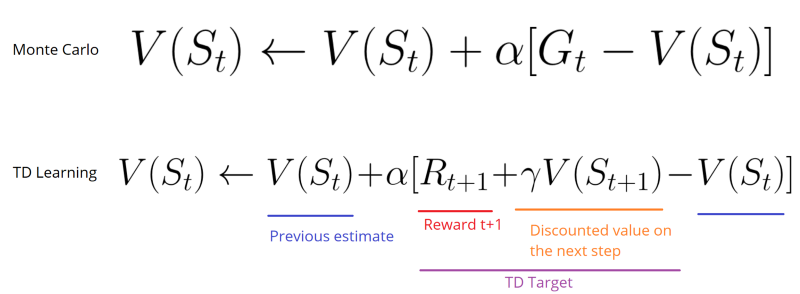

Monte Carlo approach:
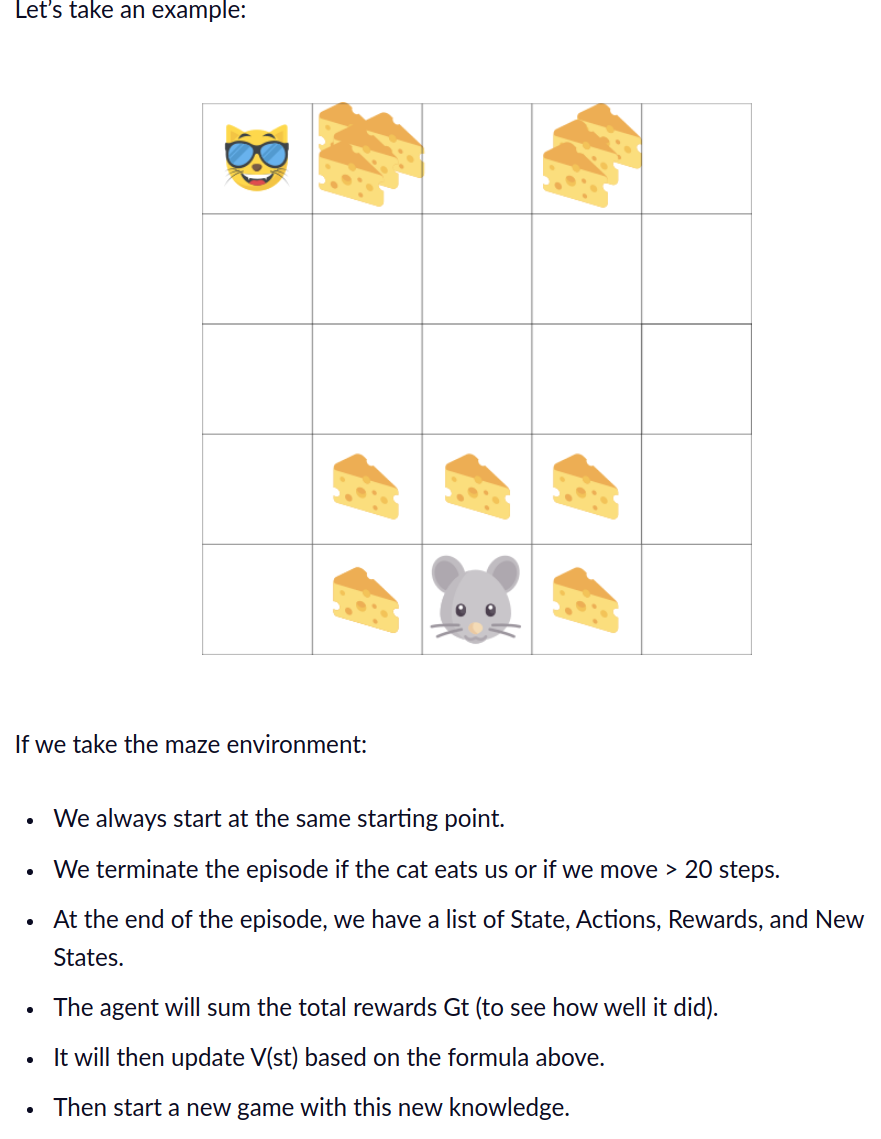

TD-learning doesn't wait until the end of the episode to update the maximum average discounted reward.

Updates happen after any individual step.

### Q-Learning:

Q-learning is a reinforcement learning algorithm that learns the quality of actions at every state $s \in S$. The 'Q' in Q-learning means *quality of action*.

- The goal of the traditional Q-learning algorithm is to build up a Q-table. The Q-table is just a lookup table that records the *maximum expected future reward* for each action at each state. The rows of the Q-table are states, the columns are actions that can be taken at those states. Each cell holds the Q-value: $Q(s, a)$
    - Example of an environment and its corresponding Q-table 
    <img src="images/q-table-example.png" width="50%">


- We don't implement a policy in Q-learning. We just improve our Q-table and then our 'policy' is just to always pick the best action at each state, according to the Q-table. Think of the Q-table as a cheatsheet

#### Q-Function:

The Q-function is similar to the value function, but it maps a state *and an action* to a reward: $Q^\pi : S \times A \to \mathbb{R}$.

The output Q-value, $Q^\pi(s, a)$, is the average discounted reward received by the agent when they begin in state $s$ having chosen action $a$ at the __first timestep__ and then choosing actions based on the policy $\pi$ thereafter.

<img src="images/q-function-formula.png" width="60%">


The Q-function is learnt by applying the following Q-learning algorithm which uses the Bellman equation as the update rule.

#### Q-learning algorithm

<table>
    <tr>
        <td width="20%">            
            <img src="images/q-learning-algorithm.png" width="100%">
        </td>
        <td>
            <img src="images/q-learning-algorithm-pseudocode.png" width="100%">
        </td>
    <tr>
</table>


<img src="images/q-learning-algorithm.gif" width="60%"/>

1: Initialise all cells of the Q-table to 0

3: Choosing an action $a$ for this time step $t$

- At the start, we initialise an exploration rate $\epsilon=1$ &mdash; since initially everything is unexplored, therefore there are no reward pathways we could exploit

- We generate a random number in the interval $[0, 1]$, and if that number is greater than $\epsilon$, then we favour exploitation rather than exploration
    - Initially, we must have a big epsilon value $\epsilon$ that gradually gets smaller
    <img src="images/q-learning-algorithm-epsilon-tradeoff.png" width="50%">


4 and 5: Evaluating the chosen action $a$

- The resulting state after choosing action $a$ is $s'$ and the reward obtained for the transition $\delta(s, a)=s'$ is $R(s, a) = r$.

- We update the cell's $Q(s, a)$ value using the Bellman equation:

$$
    Q(s, a) := Q(s, a) + \eta \big( r + \gamma \max Q'(s', a') - Q(s, a) \big)
$$


<img src="images/q-learning-algorithm-bellman-equation.png" width="80%">


Alternative annotations of the Bellman equation:

<img src="images/bellman-equation.png" width="100%">


<hr />

#### Determining the Update Rule:



For a deterministic environment, the optimal policy $\pi^*$, optimal Q-function $Q^*$ and optimal value function $V^*$ are related by:

$$
\begin{align}
    \pi^*(s) &= \max_a \big( Q^*(s, a) \big) \tag{1} \\
    Q^*(s, a) &= \underbrace{R(s, a)}_{\text{immediate reward}} + \gamma V^*\big( \underbrace{\delta (s, a) \big)}_{\text{new state}} \tag{2} \\ 
    V^*(s) &= \max_b\big( Q^*(s, b)\big) \tag{3}
\end{align}
$$


$(1)$ &mdash; the optimal policy chooses the action at state $s$ to be whichever action corresponds to the highest Q-value

$(2)$ &mdash; the quality of taking action $a$ at state $s$ is the immediate reward plus the discounted value of the next state

$(3)$ &mdash; the value of a state $s$ is the best Q-value at that state

Combining $(2)$ and $(3)$, we get the equation relating $Q^*$ back to itself:

$$
    Q^*(s, a) = R(s, a) + \gamma \max_b \big( Q^*\big(\delta(s, a), b\big) \big),
$$

where $b$ is the action that maximises the Q-value of the next state. The update rule in a deterministic environment follows from the above result:

$$
    Q(s_t, a_t) := r_t + \gamma \max_b \big( Q(s_{t+1}, b) \big)
$$

If the environment is stochastic, then we introduce a learning rate and keep a running sum in the update rule:
$$
    Q(s_t, a_t) := Q(s_t, a_t) + \eta \big( r_t + \gamma \max_{b} \big( Q(s_{t+1}, b) - Q(s_t, a_t) \big) \big)
$$

#### Example Q-Value Calculations:

<img src="images/delayed-reinforcement-example.png" width="75%">


$Q(s_2, a_2)$ is the value of state $s_2$, given that we were forced to choose $a_2$ at the first timestep.

$Q^*(s_2, a_2) = 1 + 0.9\cdot V^*(s_1) = 1+0.9\cdot 14.3 = 13.87$.

$Q^*(s_2, a_1) = V^*(s_2) = 17$, since if we were forced to pick $a_1$ at $s_2$, that would've been the same as what the optimal policy would have picked as well.

$Q^*(s_3, a_1) = 1 + 0.9V^*(s_2) = 16.3$.

#### Theoretical Results:

- Theorem. Q-learning will eventually converge to the optimal policy for any finite Markov decision process, given infinite exploration time and a partly random policy.
- Theorem. TD-learning will also converge

These assumptions upon which the theoretical results are derived presents impracticalities during training:
- Delayed reinforcement &mdash; the discovery of better state transitions could take an unreasonably large number of timesteps
- Search space must be finite &mdash; otherwise training becomes uselessly slow
- Can't rely on lookup table for $Q$ values in most practical settings. Building up a Q table for *every state* and *every action possible at those states* is impossible to scale up to an environment like chess where there is an unimaginably large set of possible states
    -  Instead, we can make use of neural networks to train on a subset of the possible states and generalise

Q-learning can be combined with the use of a neural network as a Q-function approximator. This replaces the need for a lookup table and it can be applied to problems with a continuous state space. Deep Q-learning networks have produced extremely well-performing agents in games like chess, Go and even video games like Dota 2.

<hr />

### Computer Game Playing:

One of reinforcement learning's most notable early application was in backgammon in the 1990s. The TD-Gammon model became the best Backgammon player in the world in 1995.

### Backgammon Overview:

<img src="images/backgammon-board.png" width="50%">



- The white player moves checkers in increasing numbers, the black player moves their checkers in decreasing numbers

- Two die are rolled on the start of a player's turn and the resulting number on each dice tells the player how many places they're allowed to move any of their checkers by

- Whoever moves their checkers off the board first wins the game

- You are blocked from moving a checker to any point where the opponent currently has 2 or more checkers stacked

- If your checker lands on a point where the opponent only has a single checker, then that checker is sent to the middle bar where the opponent must place it back on the starting position

### Backgammon Neural Network Architecture:

#### Input Representation:
The goal is to represent the board state as an input vector to be fed into a feed-forward neural network. 

There are 24 possible possibles for checkers to occupy in the board. For both the white player and black player, we have:
- One vector of size 24 where we store 1 if a position has exactly 1 checker and 0 if not.
- One vector of size 24 where we store 1 if a position has exactly 2 checkers and 0 if not.
- One vector of size 24 where we store 1 if a position has exactly 3 checkers and 0 if not.
- One vector of size 24 where we store 1 if a position has 4 or more checkers and 0 if not. 
- 1 input node for checkers that have been pushed to the middle bar by the opponent
- 1 input node for checkers that have made it off the board

This gives a total of $2(96+1+1)=196$ nodes in the input layer.

Why model it precisely this way and not some other way? &mdash; Having 1 piece in a position is considered dangerous because the opponent can potentially send it back to the start and delay your victory. Using 1-hot encoded vectors of size 24 separately based on how many checkers there are in a particular position lets the network treat positions with only 1 checker differently to how it treats positions with 0, 2, 3, 4, ... checkers.

By applying our knowledge of the domain, we can represent the input in a way that lets the network generalise easier.

The original network had 1 hidden layer consisting of 20 hidden nodes and 1 output layer consisting of 1 output node, using `sigmoid` to give a probability of winning the game at this current board state.

#### Applying Reinforcement Learning:

The input vector represents a *state*. The output vector represents the *value* of this state.

At the start of the turn, the 2 die are rolled, then every possible board state following the resulting 2 die outcomes are determined, converted to an input vector, then fed through the neural network. Which next board state is chosen depends on which input led to the largest output value.

#### Backpropagation:


The update rule for the feed-forward network is: 
$$w := w + \eta (T-V)\frac{\partial V}{\partial w},$$ 
where $T$ is the target and $V$ is the predicted output.

Since this is not supervised learning, we don't have access to a 'true' $T$ value. How do we know what the actual output $V$ *should've been*?

We use the value of the next state $V_{t+1}$ as the expected value of $V_{t}$. This is what *temporal difference* learning does.

#### TD-Learning in Episodic Games:

Backgammon is an *episodic* game, that is, the agent can only receive a reward at the end of the whole game. If the value at the closing state of the game is $V_{m+1}$, it typically has the value 1 for win and -1 for loss. 

The game can be reduced to a sequence of estimated values:

$$
    V_{t} \to V_{t+1} \to \ldots \to V_{m} \to V_{m+1}
$$

### Resources:
- <a href="https://towardsdatascience.com/reinforcement-learning-value-function-57b04e911152">Value functions and rewards</a>
- <a href="https://medium.com/free-code-camp/an-introduction-to-reinforcement-learning-4339519de419">Reinforcement learning with Q-learning</a>
